# List of largest  publicly traded companies in the United States by revenue


## Web Scrapping

In [2]:
# Install Libraries needed
#pip install beautifulsoup4
#pip install requests
#pip install plotly
#pip install geopandas

#### Import Libraries

In [3]:
#Import Lib's
from bs4 import BeautifulSoup
import requests


#### Request and soup for the page Wikipedia

In [4]:
# URL of the page targeted in the scrap
url='https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue'

# Page Request
page=requests.get(url, verify= False)

#Soup
soup= BeautifulSoup(page.text, 'html')

c:\Users\TIBUFF\anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'en.wikipedia.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [5]:
# Testing the content the soup retrieved
print(soup)

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of largest companies in the United States by revenue - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-wid

#### Search for the object pretend

In [6]:
# the objective is to find the table with the top 100 companies in the US
table=soup.find_all('table')[1]

In [7]:
soup.find('table', class_ = 'wikitable sortable')

<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">611,289
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.

In [8]:
print(table)

<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">611,289
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.

#### Processing Table Titles 

In [9]:
# inspection i Wikipedia gives us the tag for the columns is <th>
world_titles=table.find_all('th')
print(world_titles)

[<th>Rank
</th>, <th>Name
</th>, <th>Industry
</th>, <th>Revenue <br/>(USD millions)
</th>, <th>Revenue growth
</th>, <th>Employees
</th>, <th>Headquarters
</th>]


In [10]:
#Obtem o nome de cada coluna da tabela
#Got the name of each column
world_table_titles = [title.text.strip() for title in world_titles]
print(world_table_titles)

['Rank', 'Name', 'Industry', 'Revenue (USD millions)', 'Revenue growth', 'Employees', 'Headquarters']


## Análise de  Dados / Data Analysis


#### Tratamento dos Dados / Data Processing

In [11]:
#bibliotecas
#Libraries
import pandas as pd

In [12]:
df=pd.DataFrame(columns=world_table_titles)
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters


In [13]:
# inspection gives us the tag for the columns is <tr>
#inspecionando o site verifica-se que o tag pretendido é o <tr>
column_data=table.find_all('tr')
print(column_data)

[<tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>, <tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">611,289
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.7%
</td>
<td style="text-align:center;">2,100,000
</td>
<td><

In [14]:
# inspection gives us the tag for the columns is <td>
#Collect the data to a dataframe
for row in column_data[1:]:
   row_data= row.find_all('td')
   individual_row_data=[data.text.strip()for data in row_data]
   individual_row_data
   #Insert the data in the df based on the lenght
   length = len(df)
   df.loc[length] = individual_row_data
   

In [15]:
individual_row_data
len(df)

100

In [16]:
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
2,3,ExxonMobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
3,4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"
4,5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000","Minnetonka, Minnesota"
...,...,...,...,...,...,...,...
95,96,Best Buy,Retail,"46,298",10.6%,"71,100","Richfield, Minnesota"
96,97,Bristol-Myers Squibb,Pharmaceutical industry,"46,159",0.5%,"34,300","New York City, New York"
97,98,United Airlines,Airline,"44,955",82.5%,"92,795","Chicago, Illinois"
98,99,Thermo Fisher Scientific,Laboratory instruments,"44,915",14.5%,"130,000","Waltham, Massachusetts"


In [17]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Rank                    100 non-null    object
 1   Name                    100 non-null    object
 2   Industry                100 non-null    object
 3   Revenue (USD millions)  100 non-null    object
 4   Revenue growth          100 non-null    object
 5   Employees               100 non-null    object
 6   Headquarters            100 non-null    object
dtypes: object(7)
memory usage: 6.2+ KB


,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
count,100,100,100,100,100,100,100
unique,100,100,39,99,92,97,76
top,1,Walmart,Financials,"47,194",9.4%,"50,000","New York City, New York"
freq,1,1,11,2,2,2,12


In [18]:
#Data processing

# Dados não estao no formato e tipo numérico devido aos caracteres especias nas celulas
# Data is not in numeric format and type due to special characters in cells
def conv_employes(val):
    '''
    -Remove ","
    -Converte para int
    '''
    new_val=val.replace(',','')
    return int(new_val)
    
def conv_rev_grow(val):
    '''
    -Remove "%"
    -Converte para float
    '''
    new_val=val.replace('%','')
    return float(new_val) #/ 100






In [19]:
# Aplica as funcoes e divide a cidade do estado
#Apply the transformations and split city and state


df['Rank']=df['Rank'].astype(int)
df['Employees'] = df['Employees'].apply(conv_employes)
df['Revenue growth'] = df['Revenue growth'].apply(conv_rev_grow)
df['Revenue (USD millions)'] = df['Revenue (USD millions)'].apply(conv_employes)
df[['City', 'State']] = df['Headquarters'].str.split(', ', n=1, expand=True)


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rank                    100 non-null    int32  
 1   Name                    100 non-null    object 
 2   Industry                100 non-null    object 
 3   Revenue (USD millions)  100 non-null    int64  
 4   Revenue growth          100 non-null    float64
 5   Employees               100 non-null    int64  
 6   Headquarters            100 non-null    object 
 7   City                    100 non-null    object 
 8   State                   100 non-null    object 
dtypes: float64(1), int32(1), int64(2), object(5)
memory usage: 7.4+ KB


##### Possíveis Análises:
###### 1-  Agrupamentos Por Industria
###### 2- Grafico Revenue Growth
###### 3- Qtd Empregados

In [88]:
#!pip install matplotlib
#!pip install squarify 
import matplotlib.pyplot as plt
import squarify 
import matplotlib as mpl
import seaborn as sns
from matplotlib.gridspec import GridSpec


In [22]:
#GroupBY
grupo_ind=df.groupby('Industry')
print(grupo_ind.groups)

{'Aerospace and Defense': [61], 'Aerospace and defense': [59], 'Agriculture cooperative': [91], 'Agriculture manufacturing': [82], 'Airline': [86, 90, 97], 'Apparel': [94], 'Automotive and Energy': [49], 'Automotive industry': [18, 20], 'Beverage': [45], 'Chemical industry': [76], 'Conglomerate': [6, 53, 58], 'Conglomerate and Telecomunications': [29], 'Consumer products Manufacturing': [50], 'Electronics industry': [3], 'Financial': [78, 84], 'Financial services': [22], 'Financials': [27, 31, 35, 43, 44, 46, 54, 55, 60, 62, 68], 'Food Processing': [81, 92], 'Food Service': [56], 'Food industry': [34, 57], 'Health': [8], 'Health Insurance': [14, 41], 'Healthcare': [4, 5, 13, 21, 24, 67], 'Infotech': [65], 'Insurance': [72, 77, 85, 87, 89], 'Laboratory instruments': [98], 'Logistics': [51], 'Machinery': [69], 'Media': [47], 'Petroleum industry': [2, 9, 15, 16, 17, 42, 48, 73, 75, 93], 'Petroleum industry and Logistics': [71], 'Pharmaceutical industry': [10, 26, 37, 39, 70, 74, 96], 'Ret

In [23]:
list(grupo_ind.groups)


['Aerospace and Defense',
 'Aerospace and defense',
 'Agriculture cooperative',
 'Agriculture manufacturing',
 'Airline',
 'Apparel',
 'Automotive and Energy',
 'Automotive industry',
 'Beverage',
 'Chemical industry',
 'Conglomerate',
 'Conglomerate and Telecomunications',
 'Consumer products Manufacturing',
 'Electronics industry',
 'Financial',
 'Financial services',
 'Financials',
 'Food Processing',
 'Food Service',
 'Food industry',
 'Health',
 'Health Insurance',
 'Healthcare',
 'Infotech',
 'Insurance',
 'Laboratory instruments',
 'Logistics',
 'Machinery',
 'Media',
 'Petroleum industry',
 'Petroleum industry and Logistics',
 'Pharmaceutical industry',
 'Retail',
 'Retail and cloud computing',
 'Technology',
 'Technology and Cloud Computing',
 'Telecom Hardware Manufacturing',
 'Telecommunications',
 'Transportation']

In [24]:
df[df['Industry'].str.contains('Aero')] # Aerospace and Defense
df[df['Industry'].str.contains('Automotive')] # After reviewing, should change every event in the list to 'Automotive' Company
df[df['Industry'].str.contains('Financial')] # Change Everything to Financial
df[df['Industry'].str.contains('Food')] # Change to Food
df[df['Industry'].str.contains('Health')]    # thinking about grouping everybody into "Healthcare", nut there some companies to take on consideration
df[df['Industry'].str.contains('Petroleum')]  # Aggregate to "Petroleum"
df[df['Industry'].str.contains('Retail')]  # Take Amazon into consideraon, tag is retail and cloud computing
df[df['Industry'].str.contains('Telecom')] # Change Cisco to Telecom instead of "Telecom Hardware Manufacturing	"
df[df['Industry'].str.contains('Insurance')] # thinking about grouping everybody into "Healthcare", nut there some companies to take on consideration

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters,City,State
14,15,Cigna,Health Insurance,180516,3.7,70231,"Bloomfield, Connecticut",Bloomfield,Connecticut
41,42,Humana,Health Insurance,92870,11.8,67100,"Louisville, Kentucky",Louisville,Kentucky
72,73,New York Life Insurance Company,Insurance,58445,14.2,15050,"New York City, New York",New York City,New York
77,78,AIG,Insurance,56437,8.4,26200,"New York City, New York",New York City,New York
85,86,Allstate,Insurance,51412,3.4,54250,"Northfield Township, Cook County, Illinois",Northfield Township,"Cook County, Illinois"
87,88,Liberty Mutual,Insurance,49956,3.6,50000,"Boston, Massachusetts",Boston,Massachusetts
89,90,Progressive Corporation,Insurance,49611,4.0,55063,"Mayfield Village, Ohio",Mayfield Village,Ohio


In [25]:
# After reviewing, should change every event in the list to 'Automotive' Company
for x in df.index:
  if df.loc[x, "Industry"] == 'Automotive industry' or df.loc[x, "Industry"] == 'Automotive and Energy' :
    df.loc[x, "Industry"] = 'Automotive'    
#df[df['Industry'].str.contains('Automotive')]   

In [26]:
# After reviewing, should change every event in the list to 'Automotive' Company
for x in df.index:
  if df.loc[x, "Industry"] == 'Automotive industry' or df.loc[x, "Industry"] == 'Automotive and Energy' :
    df.loc[x, "Industry"] = 'Automotive'    
#df[df['Industry'].str.contains('Automotive')]   

# Aerospace and Defense
for x in df.index:
  if df.loc[x,'Industry'] == 'Aerospace and defense':
    df.loc[x,'Industry'] = "Aerospace and Defense"
#df[df['Industry'].str.contains('Aero')]

#Change Everything to Financial
Fin = df['Industry'].str.contains('Financial')
df.loc[Fin,"Industry"] = 'Financial'
df[df['Industry'].str.contains('Financial')]

#Change Everything to Food
Food=df['Industry'].str.contains('Food')
df.loc[Food,'Industry'] = 'Food'
df[df['Industry'].str.contains('Food')]

# Aggregate to "Petroleum"
Pet=df['Industry'].str.contains('Petroleum')
df.loc[Pet,'Industry'] = 'Petroleum'
df[df['Industry'].str.contains('Petroleum')]

# The Case of Amazon & Cloud computing (AWS)
ret=df['Industry'].str.contains('Retail')
df.loc[ret,'Industry'] = 'Retail'
df[df['Industry'].str.contains('Retail')]


# Health Insurance to insurance
ins=df['Industry'].str.contains('Health Insurance')
df.loc[ins,'Industry'] = 'Insurance'
df[df['Industry'].str.contains('Insurance')]

# Healthcare to Health
ins=df['Industry'].str.contains('Healthcare')
df.loc[ins,'Industry'] = 'Health'
df[df['Industry'].str.contains('Health')]



,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters,City,State
4,5,UnitedHealth Group,Health,324162,12.7,400000,"Minnetonka, Minnesota",Minnetonka,Minnesota
5,6,CVS Health,Health,322467,10.4,259500,"Woonsocket, Rhode Island",Woonsocket,Rhode Island
8,9,McKesson Corporation,Health,276711,4.8,48500,"Irving, Texas",Irving,Texas
13,14,Cardinal Health,Health,181364,11.6,46035,"Dublin, Ohio",Dublin,Ohio
21,22,Elevance Health,Health,156595,13.0,102200,"Indianapolis, Indiana",Indianapolis,Indiana
24,25,Centene,Health,144547,14.7,74300,"St. Louis, Missouri",St. Louis,Missouri
67,68,HCA Healthcare,Health,60233,2.5,250500,"Nashville, Tennessee",Nashville,Tennessee


In [27]:
Grouped_industry = df.groupby(['Industry'])['Industry'].count()
Grouped_industry

Industry
Aerospace and Defense                  2
Agriculture cooperative                1
Agriculture manufacturing              1
Airline                                3
Apparel                                1
Automotive                             3
Beverage                               1
Chemical industry                      1
Conglomerate                           3
Conglomerate and Telecomunications     1
Consumer products Manufacturing        1
Electronics industry                   1
Financial                             14
Food                                   5
Health                                 7
Infotech                               1
Insurance                              7
Laboratory instruments                 1
Logistics                              1
Machinery                              1
Media                                  1
Petroleum                             11
Pharmaceutical industry                7
Retail                                11
Technol

In [28]:
Grouped_industry = df.groupby(['Industry'], as_index= False)
#Grouped_industry['Revenue (USD millions)']
#teste=new_df.groupby(['Industry']).size().to_frame()



In [29]:
teste=Grouped_industry[['Revenue (USD millions)']].aggregate(sum)
#Understanding witch one is the smaller group in Revenue
teste[teste['Revenue (USD millions)'] ==teste['Revenue (USD millions)'].min()]

,Industry,Revenue (USD millions)
17,Laboratory instruments,44915


In [30]:
teste.sort_values(by=['Revenue (USD millions)'], inplace= True, ignore_index=True, ascending=False)
teste

,Industry,Revenue (USD millions)
0,Retail,2092892
1,Petroleum,1580268
2,Health,1466079
3,Financial,1189129
4,Pharmaceutical industry,730059
5,Technology and Cloud Computing,541636
6,Insurance,539247
7,Conglomerate,445718
8,Automotive,396254
9,Electronics industry,394328


In [31]:
teste=teste.head(10)

In [32]:
# Definindo a paleta de cores para o treemap
cmap = mpl.cm.seismic
mini = min(teste['Revenue (USD millions)'])
maxi = max(teste['Revenue (USD millions)'])
norm = mpl.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(i)) for i in teste['Revenue (USD millions)']]

(0.0, 100.0, 0.0, 100.0)

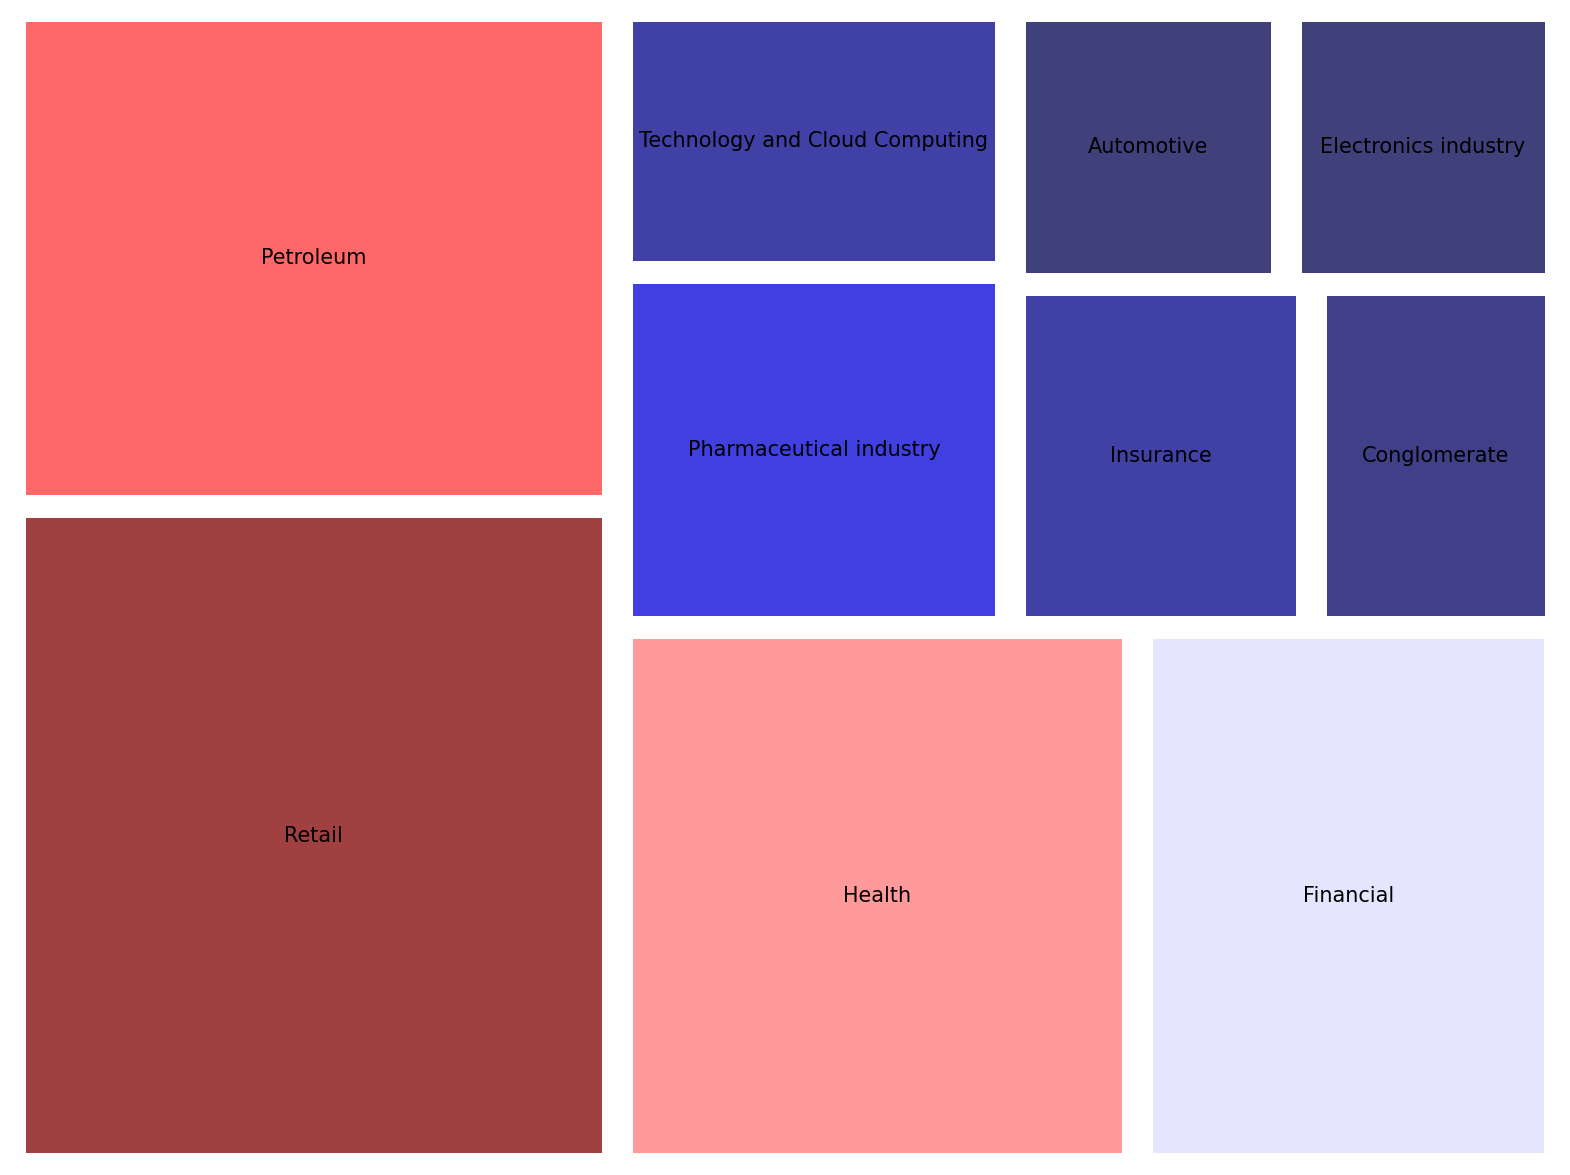

In [33]:

color = 'black'
mpl.rcParams['text.color'] = color
mpl.rcParams['font.size'] = 15

plt.figure(figsize=(20, 15))
norms = squarify.normalize_sizes(teste['Revenue (USD millions)'].to_list(),  dx=3, dy=3)
squarify.plot(sizes= norms, label=teste['Industry'], alpha = 0.75, color=colors, pad= True)

#Removing the axis values
plt.axis('off')

#teste


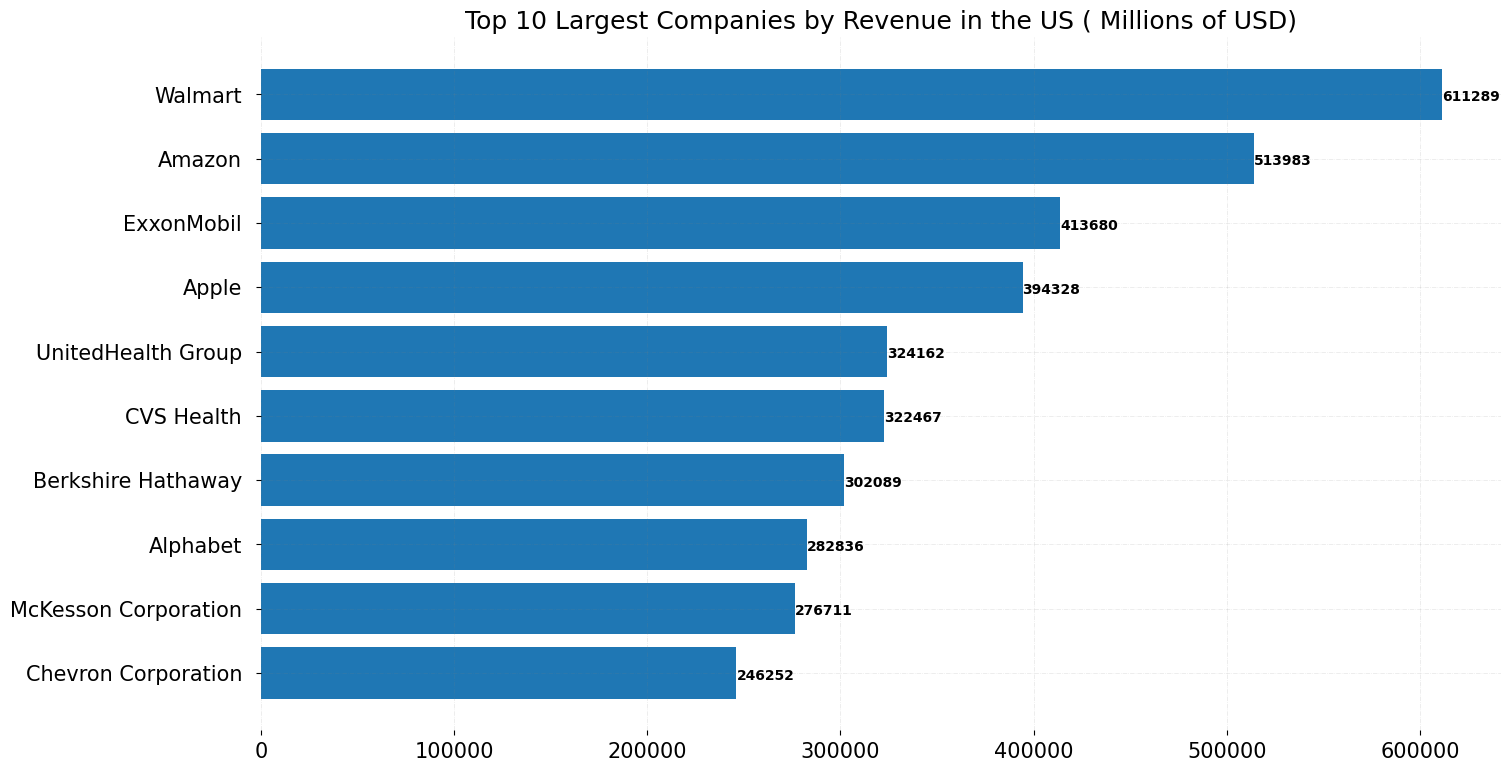

In [34]:
# plot Size
fig, ax = plt.subplots(figsize=(16,9))

# Horizontal bars
ax.barh(df['Name'][:10], df['Revenue (USD millions)'][:10])

#ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#      ylim=(0, 8), yticks=np.arange(1, 8))
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

#Show Top Values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, 
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='black')


#Add Plot Title 
ax.set_title ( 'Top 10 Largest Companies by Revenue in the US ( Millions of USD)')
plt.show()

In [35]:
#Formata os valores desejados
#Data Format desired
df_style=df.style.format({
    "Revenue (USD millions)": '${:,d}',
    "Employees": "{:,d}",
    "Revenue growth": "{:.1f}%"
}).hide_index()

C:\Users\TIBUFF\AppData\Local\Temp\ipykernel_11268\100744129.py:7: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  }).hide_index()


In [36]:
df_style

Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters,City,State
1,Walmart,Retail,"$611,289",6.7%,"2,100,000","Bentonville, Arkansas",Bentonville,Arkansas
2,Amazon,Retail,"$513,983",9.4%,"1,540,000","Seattle, Washington",Seattle,Washington
3,ExxonMobil,Petroleum,"$413,680",44.8%,"62,000","Spring, Texas",Spring,Texas
4,Apple,Electronics industry,"$394,328",7.8%,"164,000","Cupertino, California",Cupertino,California
5,UnitedHealth Group,Health,"$324,162",12.7%,"400,000","Minnetonka, Minnesota",Minnetonka,Minnesota
6,CVS Health,Health,"$322,467",10.4%,"259,500","Woonsocket, Rhode Island",Woonsocket,Rhode Island
7,Berkshire Hathaway,Conglomerate,"$302,089",9.4%,"383,000","Omaha, Nebraska",Omaha,Nebraska
8,Alphabet,Technology and Cloud Computing,"$282,836",9.8%,"156,000","Mountain View, California",Mountain View,California
9,McKesson Corporation,Health,"$276,711",4.8%,"48,500","Irving, Texas",Irving,Texas
10,Chevron Corporation,Petroleum,"$246,252",51.6%,"43,846","San Ramon, California",San Ramon,California


In [37]:
df
ins=df['State'].str.contains('Cook County, Illinois')
df.loc[ins,'State'] = 'Illinois'
df[df['State'].str.contains('Illinois')]

ins=df['State'].str.contains('D.C')
df.loc[ins,'State'] = 'District of Columbia'
df[df['State'].str.contains('District of Columbia')]


,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters,City,State
27,28,Fannie Mae,Financial,121596,19.7,8000,"Washington, D.C.",Washington,District of Columbia
51,52,United States Postal Service,Logistics,78620,2.0,576000,"Washington, D.C.",Washington,District of Columbia


In [38]:
state_gb=df.groupby(['State'], as_index= False)
state_gb=state_gb[['Revenue (USD millions)']].aggregate(sum)


# Grouped_industry = new_df.groupby(['Industry'], as_index= False)
# teste=Grouped_industry[['Revenue (USD millions)']].aggregate(sum)
state_gb.sort_values(by='Revenue (USD millions)', inplace= True, ignore_index=True, ascending=False)
state_gb

,State,Revenue (USD millions)
0,Texas,1746953
1,California,1427400
2,New York,1194903
3,Washington,939207
4,Ohio,690882
5,Arkansas,664571
6,Illinois,590012
7,Minnesota,526774
8,Michigan,371694
9,Pennsylvania,360014


In [39]:
import geopandas as gpd

In [40]:
shape_path=r'C:\Users\TIBUFF\OneDrive - Universidade Federal de Uberlândia\Data Science\Projetos\Web_Scraping\Shapefile\cb_2018_us_state_500k.shp'
shape=gpd.read_file(shape_path)
shape

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."
5,22,01629543,0400000US22,22,LA,Louisiana,00,111897594374,23753621895,"MULTIPOLYGON (((-88.86770 29.86155, -88.86566 ..."
6,26,01779789,0400000US26,26,MI,Michigan,00,146600952990,103885855702,"MULTIPOLYGON (((-83.19159 42.03537, -83.18993 ..."
7,25,00606926,0400000US25,25,MA,Massachusetts,00,20205125364,7129925486,"MULTIPOLYGON (((-70.23405 41.28565, -70.22361 ..."
8,16,01779783,0400000US16,16,ID,Idaho,00,214049787659,2391722557,"POLYGON ((-117.24267 44.39655, -117.23484 44.3..."
9,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ..."


In [41]:
shape=pd.merge(
    left=shape,
    right=state_gb,
    left_on='NAME',
    right_on='State',
    how='left')
shape

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,State,Revenue (USD millions)
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...",NaN,NaN
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",North Carolina,212112.0
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6...",NaN,NaN
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",Virginia,267593.0
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169...",NaN,NaN
5,22,01629543,0400000US22,22,LA,Louisiana,00,111897594374,23753621895,"MULTIPOLYGON (((-88.86770 29.86155, -88.86566 ...",NaN,NaN
6,26,01779789,0400000US26,26,MI,Michigan,00,146600952990,103885855702,"MULTIPOLYGON (((-83.19159 42.03537, -83.18993 ...",Michigan,371694.0
7,25,00606926,0400000US25,25,MA,Massachusetts,00,20205125364,7129925486,"MULTIPOLYGON (((-70.23405 41.28565, -70.22361 ...",Massachusetts,221362.0
8,16,01779783,0400000US16,16,ID,Idaho,00,214049787659,2391722557,"POLYGON ((-117.24267 44.39655, -117.23484 44.3...",Idaho,77650.0
9,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ...",Florida,176329.0


In [42]:
#shape=shape.dropna()
shape=shape[~shape['NAME'].isin(['Alaska','Hawaii','Puerto Rico','Guam','United States Virgin Islands','Commonwealth of the Northern Mariana Islands','American Samoa'])]
shape.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 49 entries, 0 to 55
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   STATEFP                 49 non-null     object  
 1   STATENS                 49 non-null     object  
 2   AFFGEOID                49 non-null     object  
 3   GEOID                   49 non-null     object  
 4   STUSPS                  49 non-null     object  
 5   NAME                    49 non-null     object  
 6   LSAD                    49 non-null     object  
 7   ALAND                   49 non-null     int64   
 8   AWATER                  49 non-null     int64   
 9   geometry                49 non-null     geometry
 10  State                   27 non-null     object  
 11  Revenue (USD millions)  27 non-null     float64 
dtypes: float64(1), geometry(1), int64(2), object(8)
memory usage: 5.0+ KB


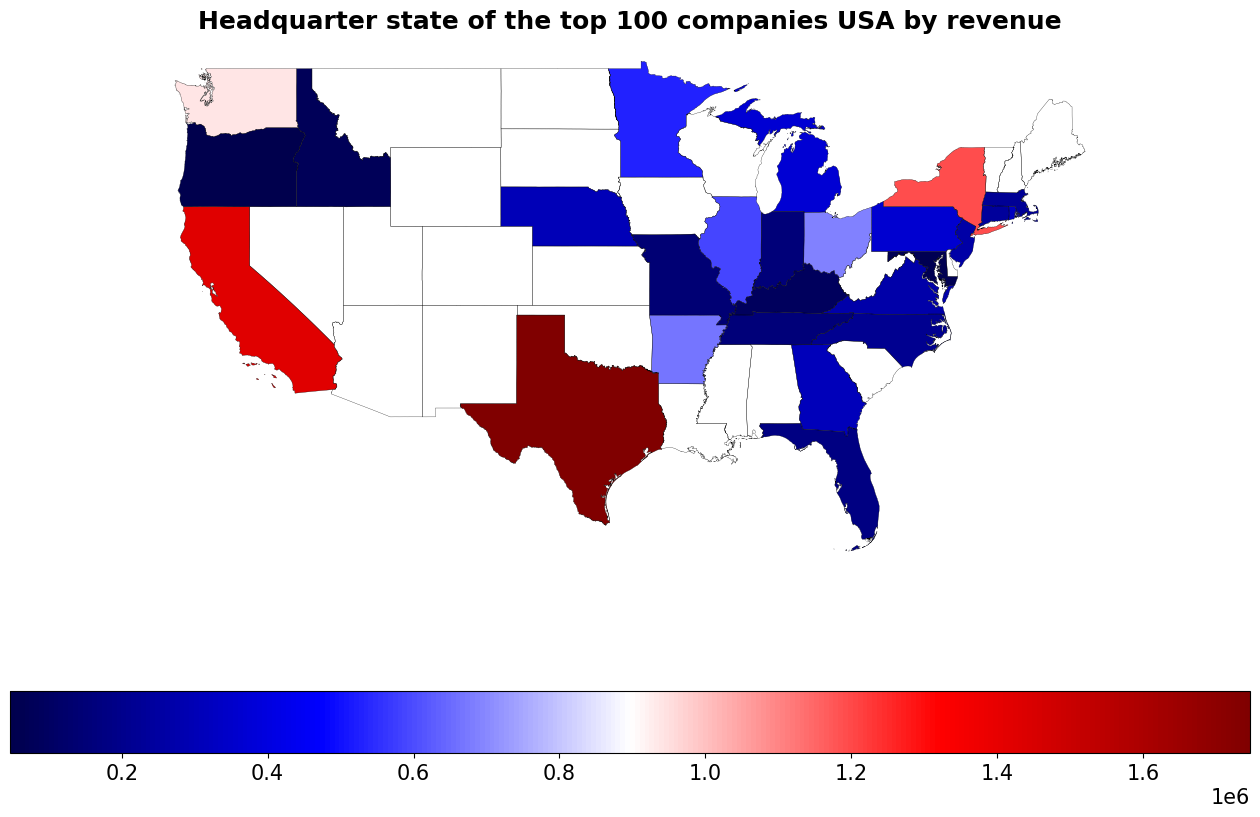

In [43]:
ax=shape.boundary.plot(edgecolor='black', linewidth=0.2, figsize=(20,10))
shape.plot(ax=ax, column='Revenue (USD millions)', legend=True, cmap='seismic',legend_kwds={'shrink':0.8, 'orientation':'horizontal'})
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

for edge in ['right','bottom','top','left']:
    ax.spines[edge].set_visible(False)
    
ax.set_title('Headquarter state of the top 100 companies USA by revenue', size=18, weight='bold')

plt.show()

In [ ]:

# Setting up the plot service
fig = plt.figure(figsize=(40, 20))
gs = GridSpec(nrows=2, ncols=2)

# First axes
ax0 = fig.add_subplot(gs[0, 0])

# Plot the treemap on the first subplot
squarify.plot(sizes=teste['norms'], label=teste['Industry'], alpha=0.75, color=some_colors, pad=True, ax=ax0)

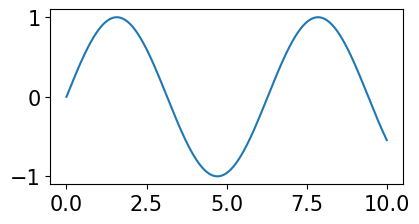

In [101]:
import numpy as np
# A new set of data
time = np.linspace(0, 10, 1000)
height = np.sin(time)
weight = time*0.3 + 2
distribution = np.random.normal(0, 1, len(time))
# Setting up the plot surface
fig = plt.figure(figsize=(10, 5))
gs = GridSpec(nrows=2, ncols=2)
# First axes
ax0 = fig.add_subplot(gs[0, 0])
ax0.plot(time, height)
# Second axes
ax1 = fig.add_subplot(gs[1, 0])
ax1.plot(time, weight)
# Third axes
ax2 = fig.add_subplot(gs[:, 1])
ax2.hist(distribution)
plt.show()

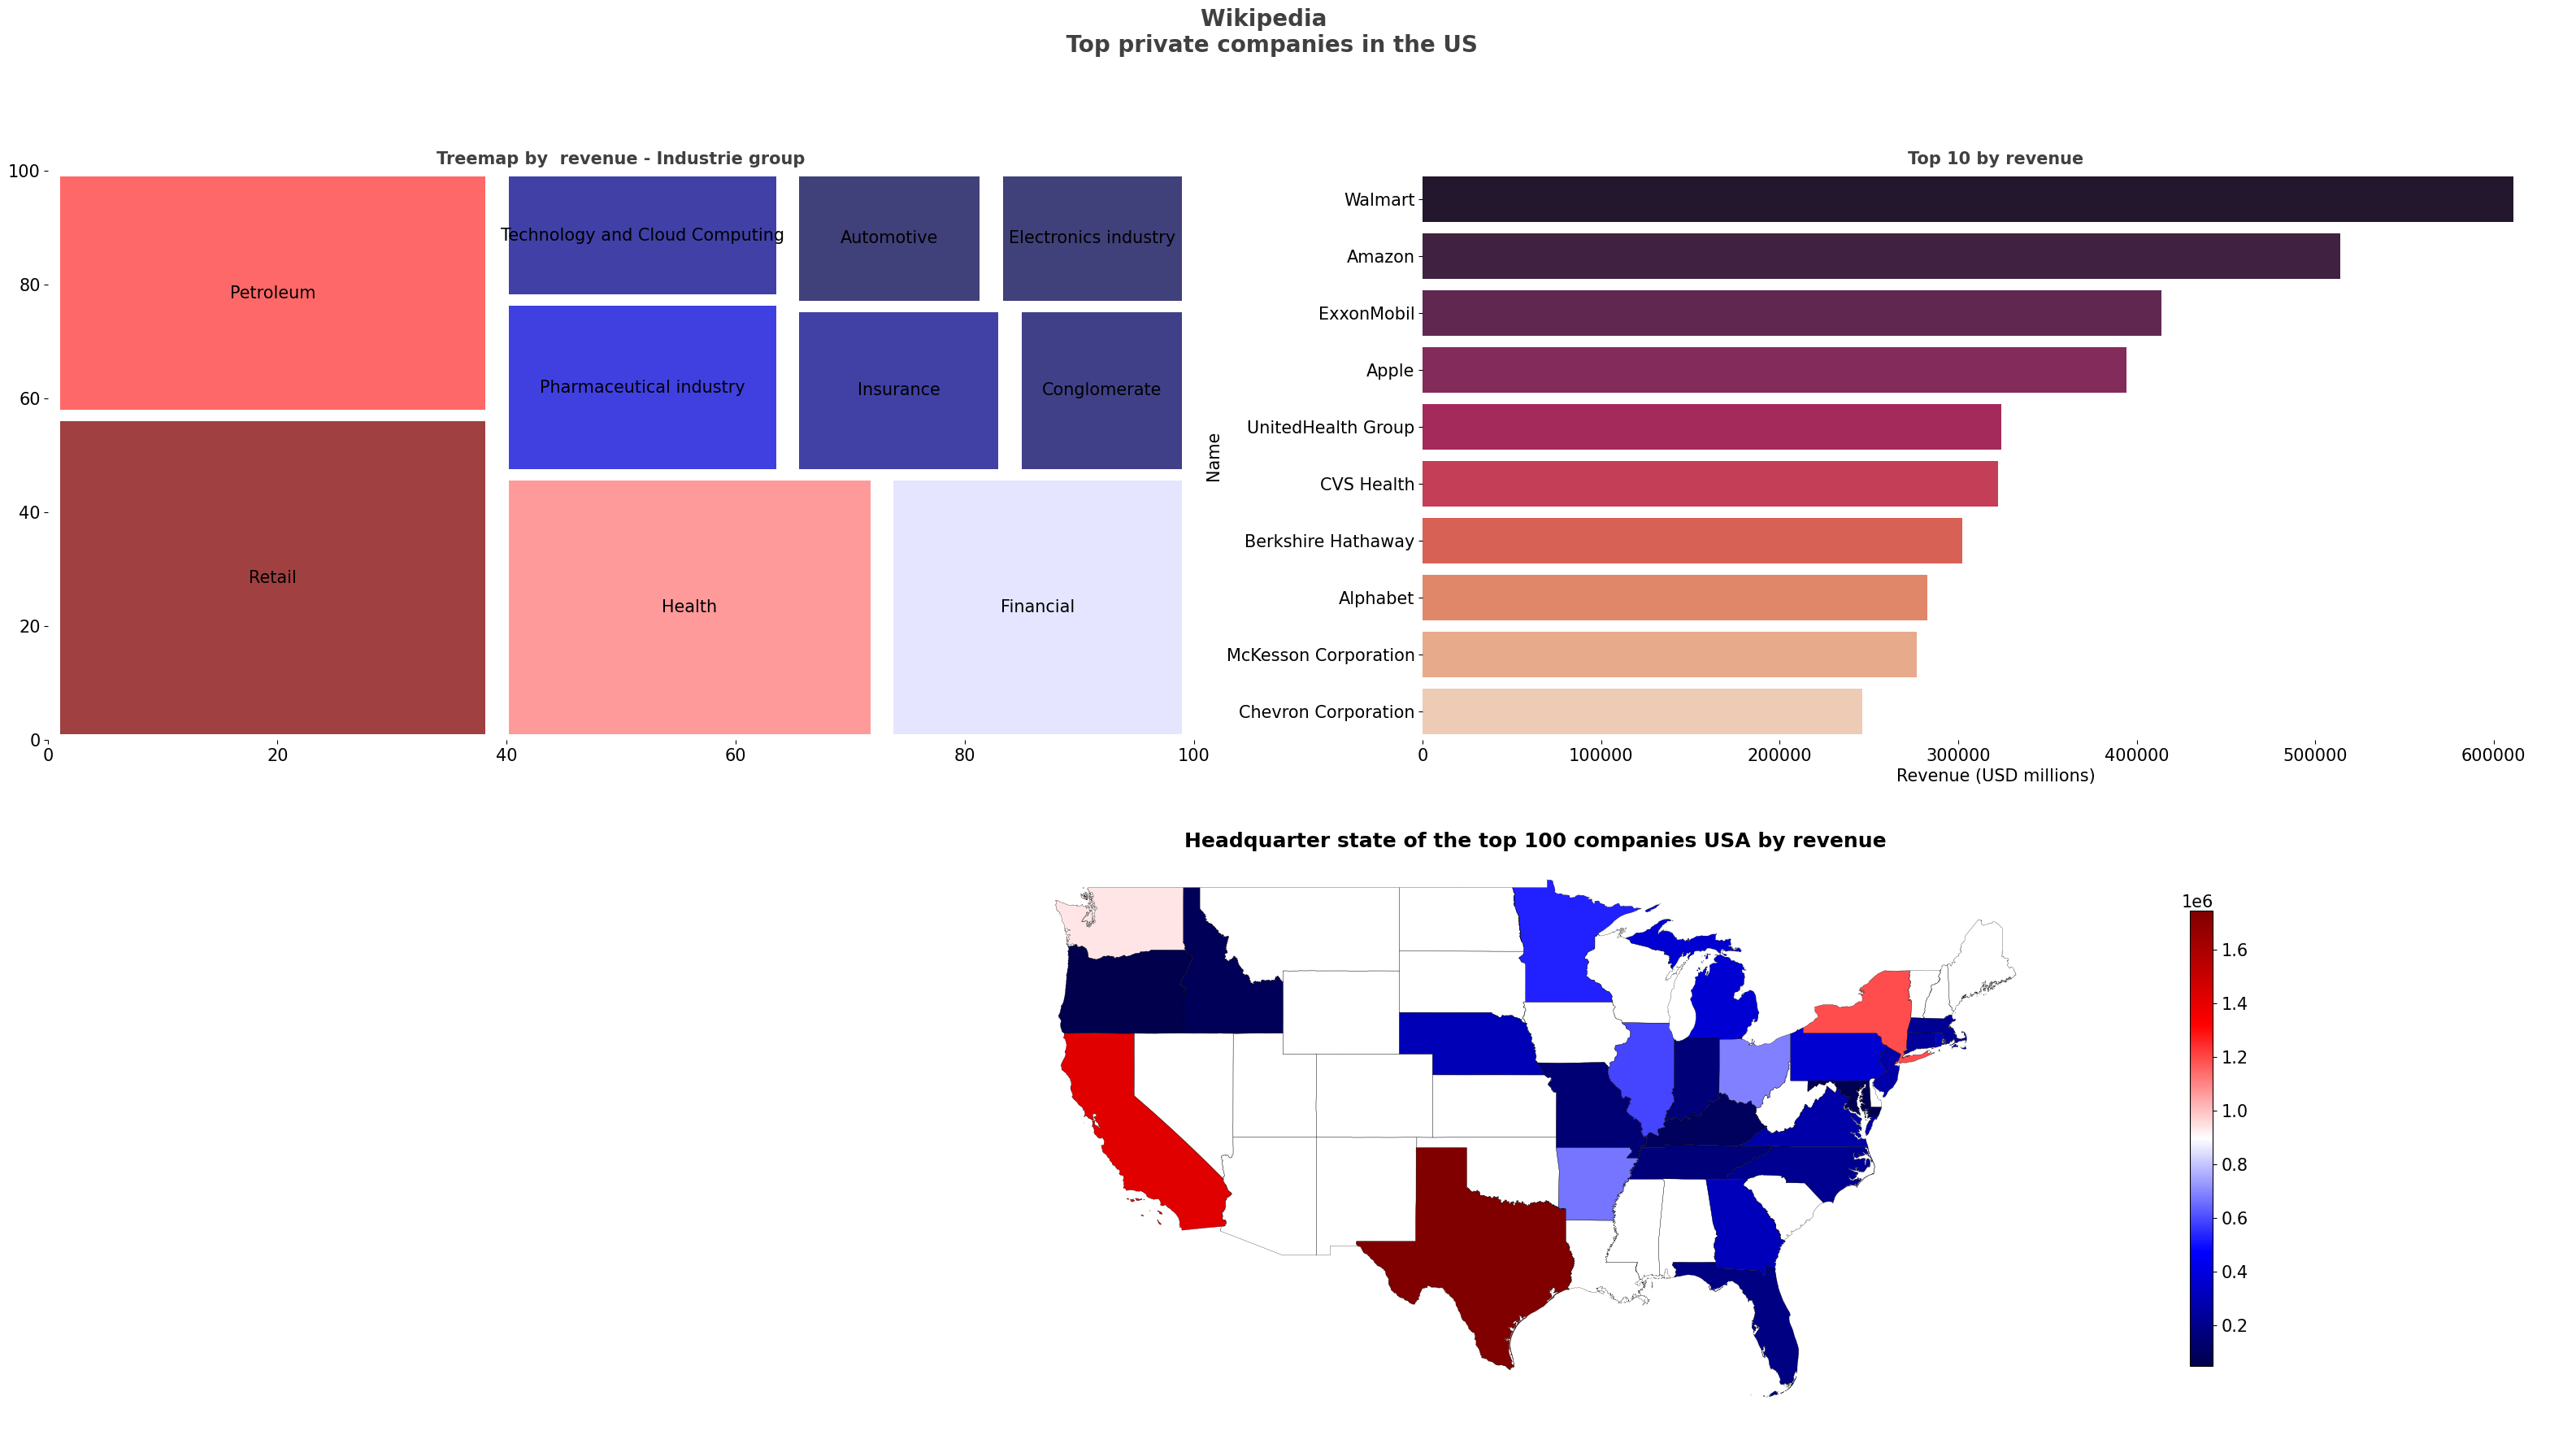

In [137]:
# # Setting up the plot surface
# fig = plt.figure(figsize=(10, 5))
# gs = GridSpec(nrows=2, ncols=2)
# # First axes
# ax0 = fig.add_subplot(gs[0, 0])
# ax0.plot(time, height)

#Setting up the plot service
fig=plt.figure( figsize=(40,20))
gs= GridSpec(nrows=2,ncols=2)
plt.suptitle('Wikipedia \n Top private companies in the US', fontsize=20, color='#404040', fontweight=600 )

#First axes
ax0 = fig.add_subplot(gs[0, 0],)
squarify.plot(sizes= norms, label=teste['Industry'], alpha = 0.75, color=colors, pad= True, ax=ax0)
ax0.set_title('Treemap by  revenue - Industrie group',fontsize=15, color='#404040', fontweight=600)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['bottom'].set_visible(False)
ax0.spines['left'].set_visible(False)
#second axes
ax1 = fig.add_subplot(gs[0,1])
sns.barplot(x=df['Revenue (USD millions)'][:10],y=df['Name'][:10], ax=ax1, palette='rocket')
ax1.set_title('Top 10 by revenue',fontsize=15, color='#404040', fontweight=600)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)

#third axes
ax2=fig.add_subplot(gs[1,:])
shape.boundary.plot(edgecolor='black', linewidth=0.2, ax=ax2)
shape.plot(ax=ax2, column='Revenue (USD millions)', legend=True, cmap='seismic',legend_kwds={'shrink':0.8, 'orientation':'vertical'})
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)

for edge in ['right','bottom','top','left']:
    ax2.spines[edge].set_visible(False)
    
ax2.set_title('Headquarter state of the top 100 companies USA by revenue', size=18, weight='bold')

plt.show()



